<a href="https://colab.research.google.com/github/cesargar1507/DatasetsUB/blob/main/M3_AI1_GarciaCesar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Estudiante:** César Emilio García Ávalos

**Actividad:** M3_AI1_Consulta de la Eurostat

In [103]:
try:
    import eurostat
except ImportError:
    !pip install eurostat
import eurostat
import json
from urllib.request import urlopen
import matplotlib.pyplot as plt

In [104]:
urlEUROSTAT = "https://ec.europa.eu/eurostat/api/dissemination/statistics/1.0/data/ilc_pw01?format=JSON&isced11=ED5-8&indic_wb=JOBSAT&sex=T&age=Y25-34&lang=en"

In [105]:
result = json.load(urlopen(urlEUROSTAT))

In [106]:
print(result["dimension"])

{'freq': {'label': 'Time frequency', 'category': {'index': {'A': 0}, 'label': {'A': 'Annual'}}}, 'unit': {'label': 'Unit of measure', 'category': {'index': {'RTG': 0}, 'label': {'RTG': 'Rating (0-10)'}}}, 'isced11': {'label': 'International Standard Classification of Education (ISCED 2011)', 'category': {'index': {'ED5-8': 0}, 'label': {'ED5-8': 'Tertiary education (levels 5-8)'}}}, 'indic_wb': {'label': 'Personnal well-being indicators', 'category': {'index': {'JOBSAT': 0}, 'label': {'JOBSAT': 'Job satisfaction'}}}, 'sex': {'label': 'Sex', 'category': {'index': {'T': 0}, 'label': {'T': 'Total'}}}, 'age': {'label': 'Age class', 'category': {'index': {'Y25-34': 0}, 'label': {'Y25-34': 'From 25 to 34 years'}}}, 'geo': {'label': 'Geopolitical entity (reporting)', 'category': {'index': {'EU': 0, 'EU27_2020': 1, 'EU28': 2, 'EU27_2007': 3, 'EA': 4, 'EA20': 5, 'EA19': 6, 'EA18': 7, 'BE': 8, 'BG': 9, 'CZ': 10, 'DK': 11, 'DE': 12, 'EE': 13, 'IE': 14, 'EL': 15, 'ES': 16, 'FR': 17, 'HR': 18, 'IT'

In [107]:
# Descargar los datos utilizando la función get_data_df()
df = eurostat.get_data_df('ilc_pw01', flags=False)

In [108]:
# Descargar los datos utilizando la función get_data_df()
df = eurostat.get_data_df('ilc_pw01', flags=False)

# Filtrar el DataFrame
df_filtered = df[(df['sex'] == 'T') &
                 (df['age'] == 'Y25-34') &
                 (df['indic_wb'] == 'JOBSAT')&
                 (df['isced11'] == 'ED5-8')]

# Mostrar las 6 primeras filas del DataFrame filtrado
df_filtered.head(6)

,freq,unit,isced11,indic_wb,sex,age,geo\TIME_PERIOD,2013,2018,2021,2022,2023
38537,A,RTG,ED5-8,JOBSAT,T,Y25-34,AL,NaN,6.5,NaN,NaN,NaN
38538,A,RTG,ED5-8,JOBSAT,T,Y25-34,AT,8.1,8.0,NaN,NaN,NaN
38539,A,RTG,ED5-8,JOBSAT,T,Y25-34,BE,7.4,7.6,NaN,NaN,NaN
38540,A,RTG,ED5-8,JOBSAT,T,Y25-34,BG,6.9,7.0,NaN,NaN,NaN
38541,A,RTG,ED5-8,JOBSAT,T,Y25-34,CH,7.6,7.5,NaN,NaN,NaN
38542,A,RTG,ED5-8,JOBSAT,T,Y25-34,CY,7.4,7.4,NaN,NaN,NaN


In [109]:
# Crear un diccionario de mapeo de códigos de país a nombres de países
mapeo_paises = result['dimension']['geo']['category']['label']

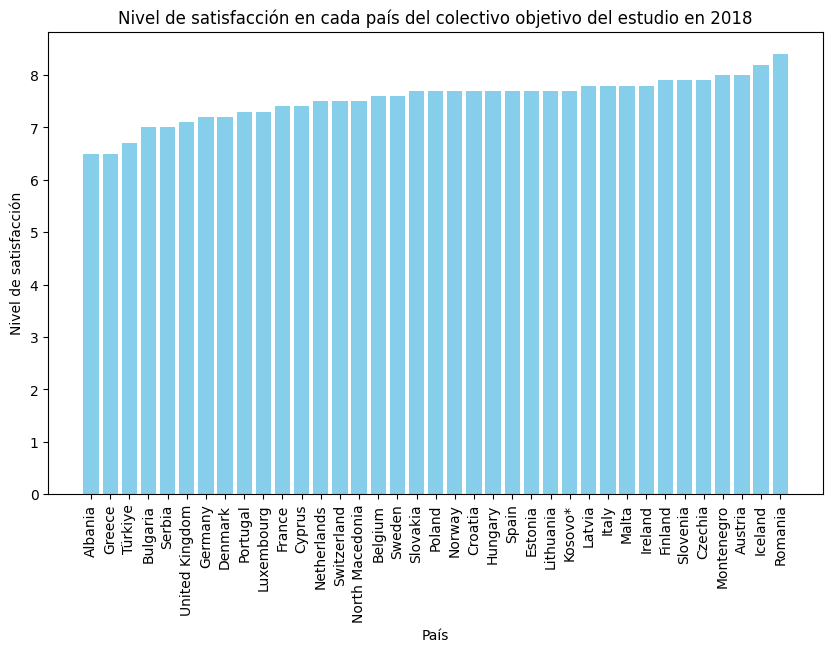

In [110]:
df_ordenado = df_filtered.sort_values("2018", ascending = True)
df_ordenado = df_ordenado[(df_ordenado['geo\TIME_PERIOD'] != 'EU') & (df_ordenado['geo\TIME_PERIOD'] != 'EU27_2020') & (df_ordenado['geo\TIME_PERIOD'] != 'EU28')  & (df_ordenado['geo\TIME_PERIOD'] != 'EU27_2007') & (df_ordenado['geo\TIME_PERIOD'] != 'EA') & (df_ordenado['geo\TIME_PERIOD'] != 'EA18') & (df_ordenado['geo\TIME_PERIOD'] != 'EA19') & (df_ordenado['geo\TIME_PERIOD'] != 'EA20')]
# Reemplazar códigos de países con nombres de países en el DataFrame
df_ordenado['geo\TIME_PERIOD'] = df_ordenado['geo\TIME_PERIOD'].map(mapeo_paises)
# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.bar(df_ordenado['geo\TIME_PERIOD'], df_ordenado['2018'], color='skyblue')
plt.xlabel('País')
plt.ylabel('Nivel de satisfacción')
plt.title('Nivel de satisfacción en cada país del colectivo objetivo del estudio en 2018')
plt.xticks(rotation=90)
plt.show()

Los países con menor satisfacción por el trabajo son **Albania y Grecia**, el país que tiene mayor satisfacción por el trabajo es **Rumania**.